In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp

In [2]:
# build the evolution gate
operator = SparsePauliOp(["XX", "YY", "ZZ"], coeffs = [0.1, 0.2, 0.3])
evo = PauliEvolutionGate(operator)

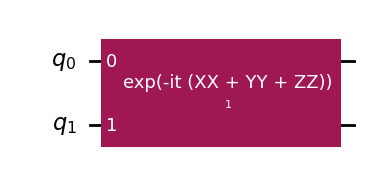

In [3]:
# append it to a circuit
circuit = QuantumCircuit(2)
circuit.append(evo, range(2))
circuit.draw("mpl", style="iqp")

In [4]:
# print the gates' information in the circuit
for instruction, qargs, cargs in circuit.data:
    print(f"{instruction.name=}")
    print(f"{instruction.label=}")
    print(f"{instruction.time=}")
    print(f"{instruction.operator=}")

instruction.name='PauliEvolution'
instruction.label='exp(-it (XX + YY + ZZ))'
instruction.time=1.0
instruction.operator=SparsePauliOp(['XX', 'YY', 'ZZ'],
              coeffs=[0.1+0.j, 0.2+0.j, 0.3+0.j])


In [5]:
import qiskit_ionq

# prepare the IonQ backend
provider = qiskit_ionq.IonQProvider()
backend = provider.get_backend("simulator")

In [6]:
job = backend.run(circuit)
result = job.result()

print(result.get_counts())

instruction_name='PauliEvolution'
{
  "target": "simulator",
  "shots": 1024,
  "name": "circuit-159",
  "input": {
    "format": "ionq.circuit.v0",
    "gateset": "qis",
    "qubits": 2,
    "circuit": [
      {
        "gate": "PAULI",
        "targets": [
          0,
          1
        ],
        "terms": [
          "XX",
          "YY",
          "ZZ"
        ],
        "coefficients": [
          "(0.1+0j)",
          "(0.2+0j)",
          "(0.3+0j)"
        ],
        "time": 1.0,
        "unitary": true,
        "rotation": 1.0
      }
    ]
  },
  "registers": {},
  "metadata": {
    "shots": "1024",
    "sampler_seed": "None",
    "qiskit_header": "H4sIANu+wmUC/1WLQQqDMBBFryKzbosKXbRXkTAkYbCBiWkSs1Dp3ZtRENzNvPf+Bp58SAtmDnOGd9PeGhg5GM34/ehMgh4CJ4zFuL3p5dVeHFiXbHHzvXu+oGKbaMTsVpJuUEK4rpC1IT5ZvFQDxDrt1W7KtT5cW9VxdUr9/nLahJK0AAAA"
  },
  "noise": {
    "model": "ideal",
    "seed": null
  }
}


/Users/churchill/GitHub/qiskit-ionq/qiskit_ionq/ionq_backend.py:377: UserWarning: Circuit circuit-159 is not measuring any qubits
  return super().run(circuit, **kwargs)
/Users/churchill/GitHub/qiskit-ionq/qiskit_ionq/helpers.py:477: UserWarning: Unable to encode (0.1+0j) using <lambda>: super(): no arguments
  warnings.warn(
/Users/churchill/GitHub/qiskit-ionq/qiskit_ionq/helpers.py:477: UserWarning: Unable to encode (0.2+0j) using <lambda>: super(): no arguments
  warnings.warn(
/Users/churchill/GitHub/qiskit-ionq/qiskit_ionq/helpers.py:477: UserWarning: Unable to encode (0.3+0j) using <lambda>: super(): no arguments
  warnings.warn(


IonQJobFailureError: IonQJobFailureError('Unable to retreive result for job 67f13814-3f2b-437d-8cf8-1f087abed851. Failure from IonQ API "PreflightError: illegal gate: "PAULI""')